In [1]:
! pip install powerlaw

In [21]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

import powerlaw # Ley de potencias
from collections import Counter # Ayuda a hacer conteos

In [7]:
data = pd.read_excel('Ejercicio_Redes.xlsx', dtype = object)

In [9]:
data.head()

,ID,NOMBRE,TELEFONO,CORREO
0,1,ADAN URIBE,9999171,adan_ur@gmail.com
1,2,ADRIAN KAUFFMANN CRUZ,9999117,adrian_@outlook.com
2,3,ALEJANDRO MONTOYA,999970,alejand@outlook.es
3,4,ALEXANDER AREVALI MUÑOZ,9999137,alexand@gmail.com
4,4,ALEXANDER AREVALI MUÑOZ,999983,alexand@gmail.com


In [11]:
aristas1 = zip(data['NOMBRE'], data['ID'])
aristas2 = zip(data['NOMBRE'], data['TELEFONO'])
aristas3 = zip(data['NOMBRE'], data['CORREO'])

In [13]:
G = nx.Graph()

G.add_edges_from(aristas1)
G.add_edges_from(aristas2)
G.add_edges_from(aristas3)

In [17]:
# cantidad de nodos
G.number_of_nodes()

277

In [19]:
# Cantidad de aristas
G.number_of_edges()

250

In [94]:
componentes = nx.connected_components(G)
componentes_ordenadas = sorted(componentes, key = len, reverse = True )

In [96]:
H = G.subgraph(componentes_ordenadas[0])

## Ley de potencias

In [98]:
grados = sorted([grado for nodo, grado in H.degree()], reverse = True)
grados

[8,
 8,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [100]:
cant_grados = Counter(grados)
cant_grados

Counter({1: 81, 3: 30, 2: 12, 5: 10, 8: 2, 4: 2, 7: 1, 6: 1})

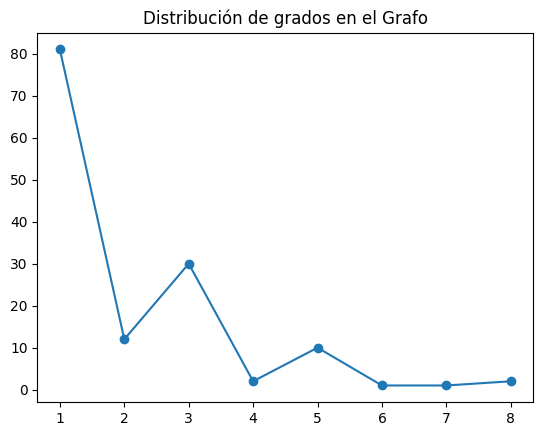

In [102]:
plt.figure()
plt.plot(cant_grados.keys(), cant_grados.values(), marker = 'o')
plt.title('Distribución de grados en el Grafo')
plt.show()

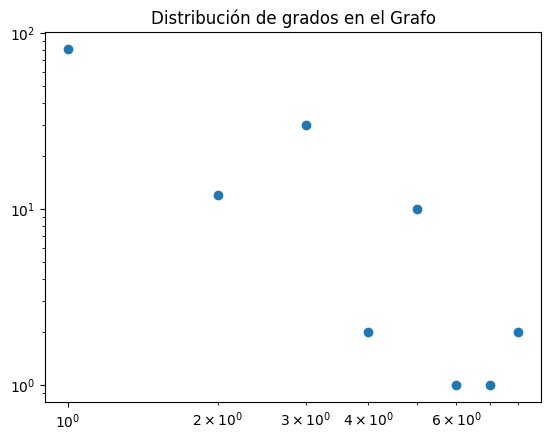

In [104]:
plt.figure()
plt.loglog(cant_grados.keys(), cant_grados.values(), marker = 'o', linestyle = 'None')
plt.title('Distribución de grados en el Grafo')
plt.show()

In [108]:
ajuste = powerlaw.Fit(grados, discrete = True)

Calculating best minimal value for power law fit
xmin progress: 85%

In [112]:
alpha = ajuste.power_law.alpha
alpha

np.float64(3.61772424613363)

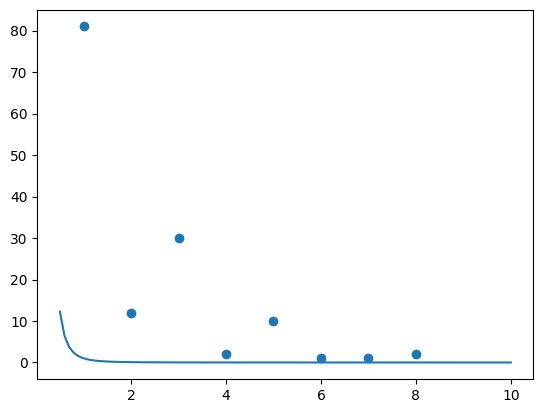

In [114]:
x = np.linspace(0.5,10,100)
y = x**(-alpha)

plt.figure()
plt.scatter(cant_grados.keys(), cant_grados.values(), marker = 'o')
plt.plot(x, y)
plt.show()

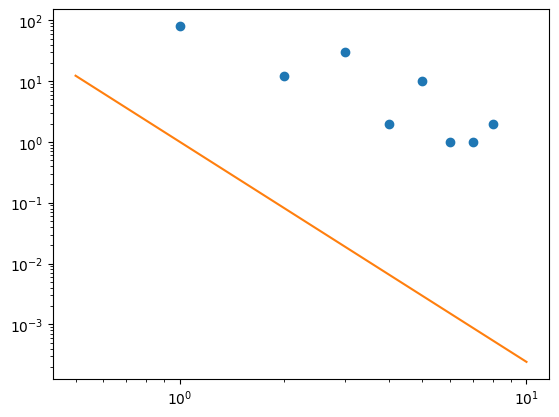

In [116]:
x = np.linspace(0.5,10,100)
y = x**(-alpha)

plt.figure()
plt.loglog(cant_grados.keys(), cant_grados.values(), marker = 'o', linestyle = 'None')
plt.loglog(x, y)
plt.show()

In [120]:
R, p = ajuste.distribution_compare('power_law', 'exponential')

In [122]:
R

np.float64(-0.14008975695942416)

In [124]:
p

np.float64(0.8924411299895846)

In [126]:
R, p = ajuste.distribution_compare('power_law', 'lognormal')

In [128]:
R

np.float64(-0.48004451311386953)

In [130]:
p

np.float64(0.2644999101255191)

In [134]:
from pyvis.network import Network

In [138]:
from pyvis.network import Network

net2 = Network(notebook = True)
net2.add_node('WILFRAN DIAZ LARA', label = 'WILFRAN DIAZ LARA', value = 10, color = 'green', shape = 'star')
net2.add_node('MARITZA PINZÓN CAMACHO', label = 'MARITZA PINZÓN CAMACHO', value = 10, color = 'purple', shape = 'star')
net2.from_nx(H)
net2.show('grafo_sospechosos.html')

grafo_sospechosos.html


In [142]:
net2 = Network(notebook = True)
net2.from_nx(G)
net2.show('grafo_sospechosos.html')

grafo_sospechosos.html
